In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time

In [3]:
!uv pip install -q --system numba-cuda==0.4.0

In [4]:
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1
config.CUDA_LOW_OCCUPANCY_WARNINGS = 0

In [15]:
from numba import cuda
import numpy as np
import math
import matplotlib.pyplot as plt

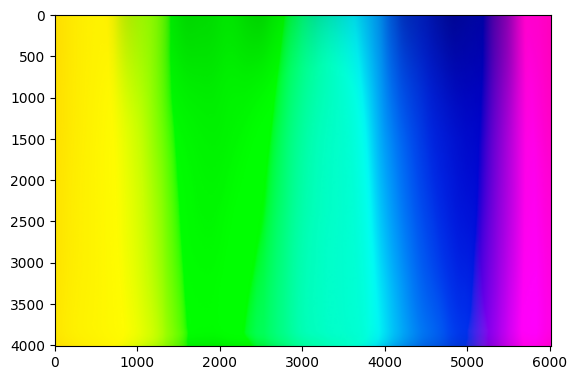

In [6]:
image = plt.imread("/content/drive/MyDrive/rgb.jpg")
plt.imshow(image)

In [7]:
imageH = image.shape[0]
imageW = image.shape[1]
imageDim = image.shape[2]

In [8]:
blockSize = (32,32)
gridSize = (imageH // blockSize[0] + 1, imageW // blockSize[1] + 1)

In [20]:
d_host = cuda.to_device(image)

d_image = cuda.device_array(image.shape, dtype = np.uint8)

In [11]:
@cuda.jit
def grayscale(img, res):
  tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
  tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y
  res[tidx,tidy] = (img[tidx, tidy, 0] + img[tidx, tidy ,1] + img[tidx, tidy ,2]) / 3

In [17]:
start = time.time()
grayscale[gridSize,blockSize](d_host,d_image)
end = time.time() - start
print("Finished in " + str(end))

Finished in 0.08360075950622559


In [18]:
result = d_image.copy_to_host()

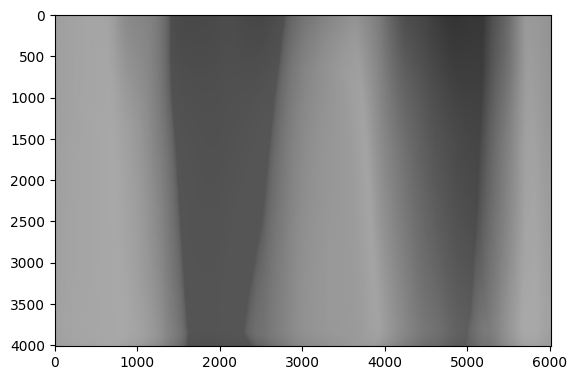

In [19]:
plt.imshow(result)